**Dataset**<br>
https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import os
import cv2

In [ ]:
data_dir = '/content/drive/MyDrive/Datasets/ML'
train_path = '/content/drive/MyDrive/Datasets/ML/train_two'
test_path = '/content/drive/MyDrive/Datasets/ML/test_two'
gtrain_path='/content/drive/MyDrive/Datasets/ML/gray_train'
gtest_path='/content/drive/MyDrive/Datasets/ML/gtest_two'

**Converting RGB to GrayScale**

In [ ]:
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

2

In [ ]:
for i in range(NUM_CATEGORIES):
    path = data_dir + '/train/' + str(i)
    images = os.listdir(path)
    count=0
    for img in images:
            imgGray = cv2.imread(path + '/' + img,0)
            cv2.imwrite(data_dir+'/gray_train/'+str(i)+'/'+str(count) +".png", imgGray)
            count=count+1

In [ ]:
path = data_dir + '/test_two/neede'
images = os.listdir(path)
count=0
for img in images:
  try:
      imgGray = cv2.imread(path + '/' + img,0)
      cv2.imwrite(data_dir+'/gtest_two/gtest/'+str(count) +".png", imgGray)
      count=count+1
  except:
      print("Error in "+img)

Error in neede


**Image Pre-processing**

In [ ]:
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Grayscale(num_output_channels=1)
])

In [ ]:
train_dataset = dsets.ImageFolder(train_path,transform=transform)
test_dataset= dsets.ImageFolder(gtest_path,transform=transform)

In [ ]:
train_dataset[0][0].size()

torch.Size([1, 32, 32])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

**Sigmoid Activation**

In [ ]:
class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        # Non-linearity 1
        self.Sigmoid1 = nn.Sigmoid()
 
        # Linear function 2: 100 --> 100
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 2
        self.Sigmoid2 = nn.Sigmoid()
 
        # Linear function 3: 100 --> 100
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 3
        self.Sigmoid3 = nn.Sigmoid()
 
        # Linear function 4 (readout): 100 --> 10
        self.fc4 = nn.Linear(hidden_dim, output_dim) 
 
    def forward(self, x):
        # Linear function 1
        out = self.fc1(x)
        # Non-linearity 1
        out = self.Sigmoid1(out)
 
        # Linear function 2
        out = self.fc2(out)
        # Non-linearity 2
        out = self.Sigmoid2(out)
 
        # Linear function 2
        out = self.fc3(out)
        # Non-linearity 2
        out = self.Sigmoid3(out)
 
        # Linear function 4 (readout)
        out = self.fc4(out)
        return out

In [ ]:
input_dim = 32*32
hidden_dim = 100
output_dim = 2

model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)

In [ ]:
criterion = nn.CrossEntropyLoss()

In [ ]:
learning_rate = 0.1

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

In [ ]:
print(model.parameters())
print(len(list(model.parameters())))
# FC 1 Parameters 
print(list(model.parameters())[0].size())
# FC 1 Bias Parameters
print(list(model.parameters())[1].size())
# FC 2 Parameters
print(list(model.parameters())[2].size())
# FC 2 Bias Parameters
print(list(model.parameters())[3].size())
# FC 3 Parameters
print(list(model.parameters())[4].size())
# FC 3 Bias Parameters
print(list(model.parameters())[5].size())
# FC 4 Parameters
print(list(model.parameters())[6].size())
# FC 4 Bias Parameters
print(list(model.parameters())[7].size())

<generator object Module.parameters at 0x7ff69bd825d0>
8
torch.Size([100, 1024])
torch.Size([100])
torch.Size([100, 100])
torch.Size([100])
torch.Size([100, 100])
torch.Size([100])
torch.Size([2, 100])
torch.Size([2])


In [ ]:
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images with gradient accumulation capabilities
        images = images.view(-1, 32*32).requires_grad_()

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images)
        

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Load images with gradient accumulation capabilities
                images = images.view(-1, 32*32).requires_grad_()

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)

                # Total number of labels
                total += labels.size(0)

                # Total correct predictions
                correct += (predicted == labels).sum()

            accuracy = 100 * correct / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))
            Sigmoid_accuracy=float(accuracy)
            Sigmoid_loss=loss.item()

Iteration: 500. Loss: 0.7277170419692993. Accuracy: 0.0
Iteration: 1000. Loss: 0.6849307417869568. Accuracy: 52.0
Iteration: 1500. Loss: 0.49341484904289246. Accuracy: 54.0
Iteration: 2000. Loss: 0.45661500096321106. Accuracy: 65.0
Iteration: 2500. Loss: 0.32022133469581604. Accuracy: 51.0
Iteration: 3000. Loss: 0.15029945969581604. Accuracy: 62.0


**Tanh Activation**

In [ ]:
class FeedforwardNeuralNetModel_tanh(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel_tanh, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        # Non-linearity 1
        self.tanh1 = nn.Tanh()
 
        # Linear function 2: 100 --> 100
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 2
        self.tanh2 = nn.Tanh()
 
        # Linear function 3: 100 --> 100
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 3
        self.tanh3 = nn.Tanh()
 
        # Linear function 4 (readout): 100 --> 10
        self.fc4 = nn.Linear(hidden_dim, output_dim) 
 
    def forward(self, x):
        # Linear function 1
        out = self.fc1(x)
        # Non-linearity 1
        out = self.tanh1(out)
 
        # Linear function 2
        out = self.fc2(out)
        # Non-linearity 2
        out = self.tanh2(out)
 
        # Linear function 2
        out = self.fc3(out)
        # Non-linearity 2
        out = self.tanh3(out)
 
        # Linear function 4 (readout)
        out = self.fc4(out)
        return out

In [ ]:
input_dim = 32*32
hidden_dim = 100
output_dim = 2

model = FeedforwardNeuralNetModel_tanh(input_dim, hidden_dim, output_dim)

In [ ]:
criterion = nn.CrossEntropyLoss()

In [ ]:
learning_rate = 0.1

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
print(model.parameters())
print(len(list(model.parameters())))
# FC 1 Parameters 
print(list(model.parameters())[0].size())
# FC 1 Bias Parameters
print(list(model.parameters())[1].size())
# FC 2 Parameters
print(list(model.parameters())[2].size())
# FC 2 Bias Parameters
print(list(model.parameters())[3].size())
# FC 3 Parameters
print(list(model.parameters())[4].size())
# FC 3 Bias Parameters
print(list(model.parameters())[5].size())
# FC 4 Parameters
print(list(model.parameters())[6].size())
# FC 4 Bias Parameters
print(list(model.parameters())[7].size())

<generator object Module.parameters at 0x7ff6a7429c50>
8
torch.Size([100, 1024])
torch.Size([100])
torch.Size([100, 100])
torch.Size([100])
torch.Size([100, 100])
torch.Size([100])
torch.Size([2, 100])
torch.Size([2])


In [ ]:
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images with gradient accumulation capabilities
        images = images.view(-1, 32*32).requires_grad_()

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images)
        

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Load images with gradient accumulation capabilities
                images = images.view(-1, 32*32).requires_grad_()

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)

                # Total number of labels
                total += labels.size(0)

                # Total correct predictions
                correct += (predicted == labels).sum()

            accuracy = 100 * correct / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))
            tanh_accuracy=accuracy
            tanh_loss=loss.item()

Iteration: 500. Loss: 0.2701485753059387. Accuracy: 66.0
Iteration: 1000. Loss: 0.10925821214914322. Accuracy: 62.0
Iteration: 1500. Loss: 0.10108263790607452. Accuracy: 61.0
Iteration: 2000. Loss: 0.055126212537288666. Accuracy: 61.0
Iteration: 2500. Loss: 0.29142192006111145. Accuracy: 64.0
Iteration: 3000. Loss: 0.029322674497961998. Accuracy: 63.0


In [ ]:
tanh_accuracy=float(tanh_accuracy)

**ReLU Activation**

In [ ]:
class FeedforwardNeuralNetModel_ReLU(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel_ReLU, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        # Non-linearity 1
        self.ReLU1 = nn.ReLU()
 
        # Linear function 2: 100 --> 100
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 2
        self.ReLU2 = nn.ReLU()
 
        # Linear function 3: 100 --> 100
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 3
        self.ReLU3 = nn.ReLU()
 
        # Linear function 4 (readout): 100 --> 10
        self.fc4 = nn.Linear(hidden_dim, output_dim) 
 
    def forward(self, x):
        # Linear function 1
        out = self.fc1(x)
        # Non-linearity 1
        out = self.ReLU1(out)
 
        # Linear function 2
        out = self.fc2(out)
        # Non-linearity 2
        out = self.ReLU2(out)
 
        # Linear function 2
        out = self.fc3(out)
        # Non-linearity 2
        out = self.ReLU3(out)
 
        # Linear function 4 (readout)
        out = self.fc4(out)
        return out

In [ ]:
input_dim = 32*32
hidden_dim = 100
output_dim = 2

model = FeedforwardNeuralNetModel_ReLU(input_dim, hidden_dim, output_dim)

In [ ]:
criterion = nn.CrossEntropyLoss()

In [ ]:
learning_rate = 0.1

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
print(model.parameters())
print(len(list(model.parameters())))
# FC 1 Parameters 
print(list(model.parameters())[0].size())
# FC 1 Bias Parameters
print(list(model.parameters())[1].size())
# FC 2 Parameters
print(list(model.parameters())[2].size())
# FC 2 Bias Parameters
print(list(model.parameters())[3].size())
# FC 3 Parameters
print(list(model.parameters())[4].size())
# FC 3 Bias Parameters
print(list(model.parameters())[5].size())
# FC 4 Parameters
print(list(model.parameters())[6].size())
# FC 4 Bias Parameters
print(list(model.parameters())[7].size())

<generator object Module.parameters at 0x7ff69bdbcbd0>
8
torch.Size([100, 1024])
torch.Size([100])
torch.Size([100, 100])
torch.Size([100])
torch.Size([100, 100])
torch.Size([100])
torch.Size([2, 100])
torch.Size([2])


In [ ]:
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images with gradient accumulation capabilities
        images = images.view(-1, 32*32).requires_grad_()

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images)
        

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Load images with gradient accumulation capabilities
                images = images.view(-1, 32*32).requires_grad_()

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)

                # Total number of labels
                total += labels.size(0)

                # Total correct predictions
                correct += (predicted == labels).sum()

            accuracy = 100 * correct / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))
            ReLU_accuracy=float(accuracy)
            ReLU_loss=loss.item()

Iteration: 500. Loss: 0.20543065667152405. Accuracy: 63.0
Iteration: 1000. Loss: 0.22885221242904663. Accuracy: 69.0
Iteration: 1500. Loss: 0.13131636381149292. Accuracy: 77.0
Iteration: 2000. Loss: 0.09727530181407928. Accuracy: 55.0
Iteration: 2500. Loss: 0.5115066766738892. Accuracy: 94.0
Iteration: 3000. Loss: 0.03987513482570648. Accuracy: 65.0


 **Leaky ReLU Activation**

In [ ]:
class FeedforwardNeuralNetModel_LeakyReLU(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel_LeakyReLU, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        # Non-linearity 1
        self.LeakyReLU1 = nn.LeakyReLU()
 
        # Linear function 2: 100 --> 100
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 2
        self.LeakyReLU2 = nn.LeakyReLU()
 
        # Linear function 3: 100 --> 100
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 3
        self.LeakyReLU3 = nn.LeakyReLU()
 
        # Linear function 4 (readout): 100 --> 10
        self.fc4 = nn.Linear(hidden_dim, output_dim) 
 
    def forward(self, x):
        # Linear function 1
        out = self.fc1(x)
        # Non-linearity 1
        out = self.LeakyReLU1(out)
 
        # Linear function 2
        out = self.fc2(out)
        # Non-linearity 2
        out = self.LeakyReLU2(out)
 
        # Linear function 2
        out = self.fc3(out)
        # Non-linearity 2
        out = self.LeakyReLU3(out)
 
        # Linear function 4 (readout)
        out = self.fc4(out)
        return out

In [ ]:
input_dim = 32*32
hidden_dim = 100
output_dim = 2

model = FeedforwardNeuralNetModel_LeakyReLU(input_dim, hidden_dim, output_dim)

In [ ]:
criterion = nn.CrossEntropyLoss()

In [ ]:
learning_rate = 0.1

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
print(model.parameters())
print(len(list(model.parameters())))
# FC 1 Parameters 
print(list(model.parameters())[0].size())
# FC 1 Bias Parameters
print(list(model.parameters())[1].size())
# FC 2 Parameters
print(list(model.parameters())[2].size())
# FC 2 Bias Parameters
print(list(model.parameters())[3].size())
# FC 3 Parameters
print(list(model.parameters())[4].size())
# FC 3 Bias Parameters
print(list(model.parameters())[5].size())
# FC 4 Parameters
print(list(model.parameters())[6].size())
# FC 4 Bias Parameters
print(list(model.parameters())[7].size())

<generator object Module.parameters at 0x7ff69bd82650>
8
torch.Size([100, 1024])
torch.Size([100])
torch.Size([100, 100])
torch.Size([100])
torch.Size([100, 100])
torch.Size([100])
torch.Size([2, 100])
torch.Size([2])


In [ ]:
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images with gradient accumulation capabilities
        images = images.view(-1, 32*32).requires_grad_()

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images)
        

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Load images with gradient accumulation capabilities
                images = images.view(-1, 32*32).requires_grad_()

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)

                # Total number of labels
                total += labels.size(0)

                # Total correct predictions
                correct += (predicted == labels).sum()

            accuracy = 100 * correct / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))
            LeakyReLU_accuracy=float(accuracy)
            LeakyReLU_loss=loss.item()

Iteration: 500. Loss: 0.4824734628200531. Accuracy: 84.0
Iteration: 1000. Loss: 0.14652083814144135. Accuracy: 53.0
Iteration: 1500. Loss: 0.13111621141433716. Accuracy: 80.0
Iteration: 2000. Loss: 0.11044450849294662. Accuracy: 60.0
Iteration: 2500. Loss: 0.08777045458555222. Accuracy: 66.0
Iteration: 3000. Loss: 0.08250164240598679. Accuracy: 68.0


**Visualization**

In [ ]:
import matplotlib.pyplot as plt

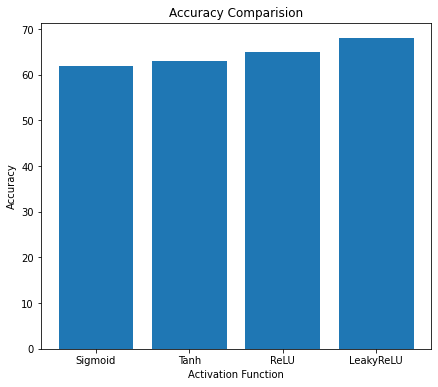

In [ ]:
plt.figure(figsize=(7,6))
x=range(4)
accuracy=[Sigmoid_accuracy,tanh_accuracy,ReLU_accuracy,LeakyReLU_accuracy]
plt.bar(x,accuracy)
title=['Sigmoid','Tanh','ReLU','LeakyReLU']
plt.xticks(x,title)
plt.xlabel('Activation Function')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparision')
plt.show()